In [ ]:
!pip install opendatasets

In [3]:
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns

## Downloading and Loading the Dataset

In [4]:
# Downloading the dataset
dataset_url = "https://www.kaggle.com/datasets/mksaad/arabic-sentiment-twitter-corpus/code"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hosammamdouh
Your Kaggle Key: ··········


100%|██████████| 16.9M/16.9M [00:00<00:00, 75.4MB/s]


In [5]:
# Loading the Dataset
train_data_neg = pd.read_csv('/content/arabic-sentiment-twitter-corpus/train_Arabic_tweets_negative_20190413.tsv' , header=None, sep='\t')
train_data_pos = pd.read_csv('/content/arabic-sentiment-twitter-corpus/train_Arabic_tweets_positive_20190413.tsv' , header=None, sep='\t')
test_data_neg = pd.read_csv('/content/arabic-sentiment-twitter-corpus/test_Arabic_tweets_negative_20190413.tsv' , header=None, sep='\t')
test_data_pos = pd.read_csv('/content/arabic-sentiment-twitter-corpus/test_Arabic_tweets_positive_20190413.tsv' , header=None, sep='\t')


In [6]:
train_data_neg[:10]

,0,1
0,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
3,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
4,neg,الدودو جايه تكمل علي 💔
5,neg,أحببته حتى أقنعنى إن ما فات من العمر كان إنتظا...
6,neg,يبدو ان دجلة اعتادت على التهام اجساد ابنائها م...
7,neg,جالس أذاكر 😣
8,neg,يكفي استخفاف بالعقل العربي هل حقا الأمن والمخا...
9,neg,ياليلل ترا اكلج كثير مشي 😭


In [7]:
test_data_pos[:10]

,0,1
0,pos,#الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران...
1,pos,صباحك خيرات ومسرات 🌸
2,pos,#تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...
3,pos,😂😂 يا جدعان الرجاله اللي فوق ال دول خطر ع تويت...
4,pos,رساله صباحيه : 💛 اللهم اسألك التوفيق في جميع ا...
5,pos,اجيال القووه والصمود والتحدي اجيال المستقبل وا...
6,pos,البنت اذا شافت امها معصبة تقوم ترتب البيت لا ا...
7,pos,جدا الصراحه بس المغرب قدها 💪
8,pos,صباح الياسمين 🍃
9,pos,لسنا مجبرين على تبرير المواقف لمن يسيء الظن بن...


In [8]:
train_data = pd.concat([train_data_pos,train_data_neg], axis = 0)
test_data = pd.concat([test_data_pos,test_data_neg], axis = 0)

In [9]:
#changing the name of columns form 0 and 1 to label and tweet
train_data.rename(columns={0:'label', 1:'tweet'}, inplace=True)
test_data.rename(columns={0:'label', 1:'tweet'}, inplace=True)
train_data

,label,tweet
0,pos,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1,pos,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
2,pos,من الخير نفسه 💛
3,pos,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
4,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...
...,...,...
22509,neg,كيف ترى أورانوس لو كان يقع مكان القمر ؟ 💙💙 كوك...
22510,neg,احسدك على الايم 💔
22511,neg,لأول مرة ما بنكون سوا 💔
22512,neg,بقله ليش يا واطي 🤔


In [10]:
label_mapping = {'neg':int(0),'pos':int(1)}

train_data['label'] = train_data['label'].map(label_mapping)
test_data ['label'] = test_data ['label'].map(label_mapping)
train_data

,label,tweet
0,1,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1,1,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
2,1,من الخير نفسه 💛
3,1,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
4,1,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...
...,...,...
22509,0,كيف ترى أورانوس لو كان يقع مكان القمر ؟ 💙💙 كوك...
22510,0,احسدك على الايم 💔
22511,0,لأول مرة ما بنكون سوا 💔
22512,0,بقله ليش يا واطي 🤔


Text(0.5, 1.0, 'Testing data')

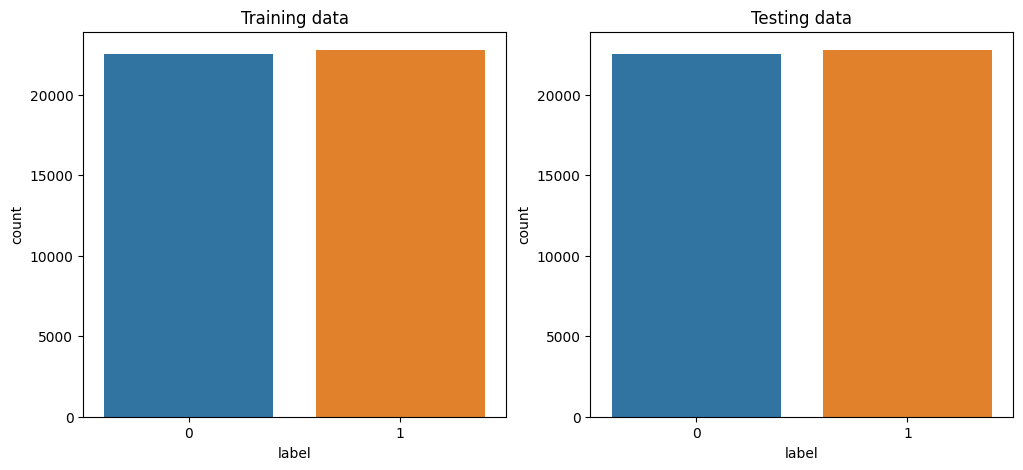

In [11]:
# check if the data set is balanced or not
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot( x=train_data.label, ax=axes[0])
axes[0].set_title('Training data')

sns.countplot( x=train_data.label, ax=axes[1])
axes[1].set_title('Testing data')


## **Tweets Preprocessing**



```
# This is formatted as code
```



*  Tokenize the setences base on the punctuation.
*  by Utlizing ISRI stemmer we stemmed each arabic word.


1.   يشجعون --- > شجع
2.    وصلوا--- > وصل



*  by Using Regular expression we only select the token to be either an english word, Arabic word or Emoji.
*  exclude any Arabic stop words by using nltk Arabic stopwords set.





In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.isri import ISRIStemmer
import regex as re

nltk.download('stopwords')
nltk.download('punkt')
arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
def preprocess_text(tweets, stopwords):
  processed_arabic_sentences = []
  stemmer = ISRIStemmer()
  for tweet in tweets:

    tokens = word_tokenize(tweet)

    # Remove stop words and apply stemming
    # \p{Emoji} to caputre each emoji
    # \u0600-\u06FF to caputre all the arabic characters
    filtered_tokens = [stemmer.stem(word) for word in tokens if word not in stopwords and re.match(r'^[a-zA-Z\u0600-\u06FF\p{Emoji}]+$', word)]

    # Join tokens into a string to be fed to the CountVectorizer in sklrean
    processed_text = ' '.join(filtered_tokens)

    processed_arabic_sentences.append(processed_text)

  return processed_arabic_sentences


In [14]:
#
X = preprocess_text(train_data.tweet.values, stopwords=arb_stopwords)
y = train_data.label.values
X_test = preprocess_text(test_data.tweet.values, stopwords=arb_stopwords)
y_test = test_data.label.values

In [15]:
#comparision between unprocessed tweet vs a preprocesed tweet
print("unprocessed text -> ",train_data.tweet.values[4])
print("processed text   -> ",X[4])


unprocessed text ->  الشيء الوحيد الذي وصلوا فيه للعالمية هو : المسيار ..! . ترى كانوا يشجعون ريال مدريد ضد النصر 🤣
processed text   ->  شيء وحد وصل علم سير ترى كان شجع درد ضد نصر 🤣


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

def train_model(model, data, targets):
    text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', model),
    ])
    text_clf.fit(data, targets)
    return text_clf

def get_accuracy(trained_model,X, y):
    predicted = trained_model.predict(X)
    accuracy = np.mean(predicted == y)
    return accuracy


In [17]:
from sklearn.tree import DecisionTreeClassifier
trained_clf_decision_tree = train_model(DecisionTreeClassifier(), X, y)
accuracy = get_accuracy(trained_clf_decision_tree, X_test, y_test)
print(f"Test dataset accuracy with DecisionTreeClassifier: {accuracy:.2f}")

Test dataset accuracy with DecisionTreeClassifier: 0.77


In [18]:
from sklearn.ensemble import RandomForestClassifier
trained_clf_randomforest = train_model(RandomForestClassifier(), X, y)
accuracy = get_accuracy(trained_clf_randomforest, X_test, y_test)
print(f"Test dataset accuracy with RandomForestClassifier: {accuracy:.2f}")

Test dataset accuracy with RandomForestClassifier: 0.79


In [19]:
from sklearn.naive_bayes import MultinomialNB
trained_clf_MultinomialNB = train_model(MultinomialNB(), X, y)
accuracy = get_accuracy(trained_clf_MultinomialNB, X_test, y_test)
print(f"Test dataset accuracy with MultinomialNB: {accuracy:.2f}")

Test dataset accuracy with MultinomialNB: 0.74
